In [23]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data=pd.read_csv('/content/drive/MyDrive/week2_python_task/winequality.csv')

In [26]:
data.head(15)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [27]:
data.shape

(6497, 13)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [29]:
data.duplicated().sum()

1168

In [30]:
data = data.drop_duplicates()

In [31]:
data.shape

(5329, 13)

In [32]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Text(195.72222222222223, 0.5, 'Data Index')

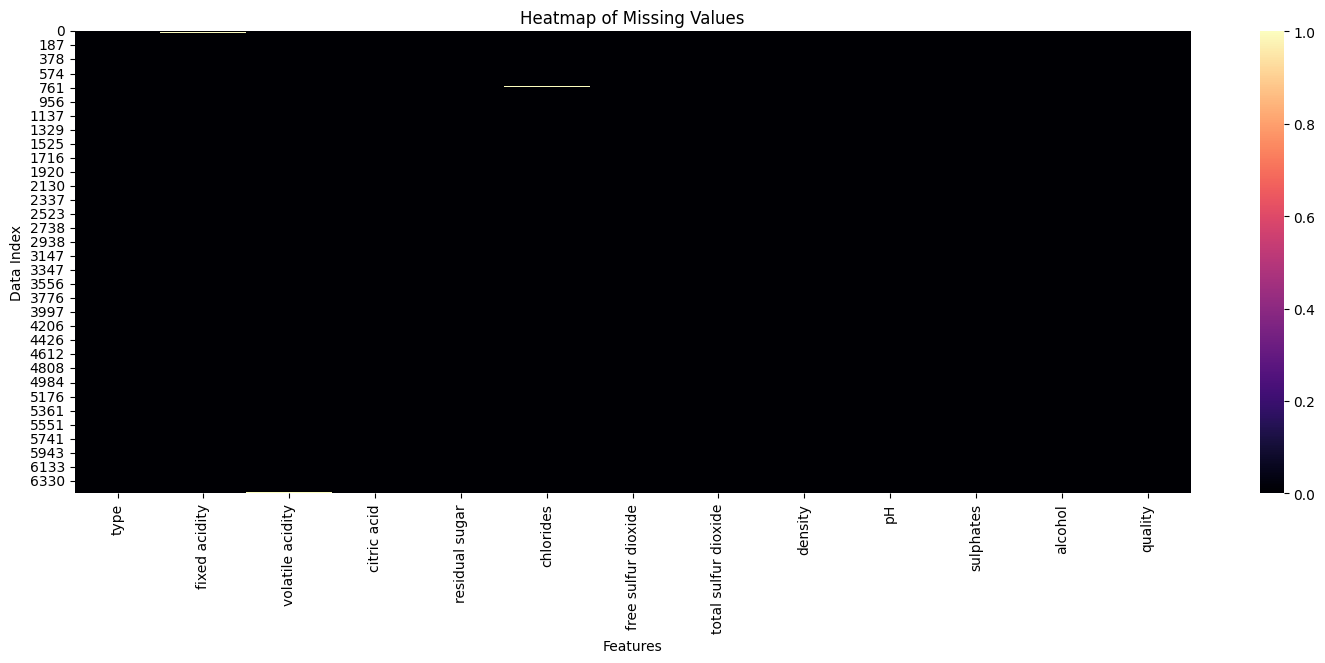

In [33]:
plt.figure(figsize=(18, 6))
sns.heatmap(data.isnull(), cmap='magma')

plt.title('Heatmap of Missing Values')
plt.xlabel('Features')
plt.ylabel('Data Index')

In [34]:
cols_with_missing_values = data.columns[data.isnull().sum() > 0] #columns with missing values

In [35]:
cols_with_missing_values

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'pH', 'sulphates'],
      dtype='object')

In [ ]:
# df1["fixed acidity"] = df1["fixed acidity"].fillna(df1["fixed acidity"].mean())  #using mean replace null values
# df1["volatile acidity"] = df1["volatile acidity"].fillna(df1["volatile acidity"].median())  #using median replace null values
# df1["citric acid"] = df1["citric acid"].fillna(df1["citric acid"].std())  #using std replace null values
# df1["residual sugar"] = df1["residual sugar"].fillna(df1["residual sugar"].mean())  #droping coulumns with null values

In [37]:
data = data.drop('type', axis = 1)

In [38]:
train_set = data.dropna(subset=cols_with_missing_values)
test_set = data[data['fixed acidity'].isnull() | data['volatile acidity'].isnull() | data['citric acid'].isnull() | data['residual sugar'].isnull() | data['chlorides'].isnull() | data['pH'].isnull() |data['sulphates'].isnull() ]

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
linear = LinearRegression()
linear.fit(train_set[['quality']],train_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates']])
predicted_values = linear.predict(test_set[['quality']])
data.loc[test_set.index,['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates']] = predicted_values

In [43]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

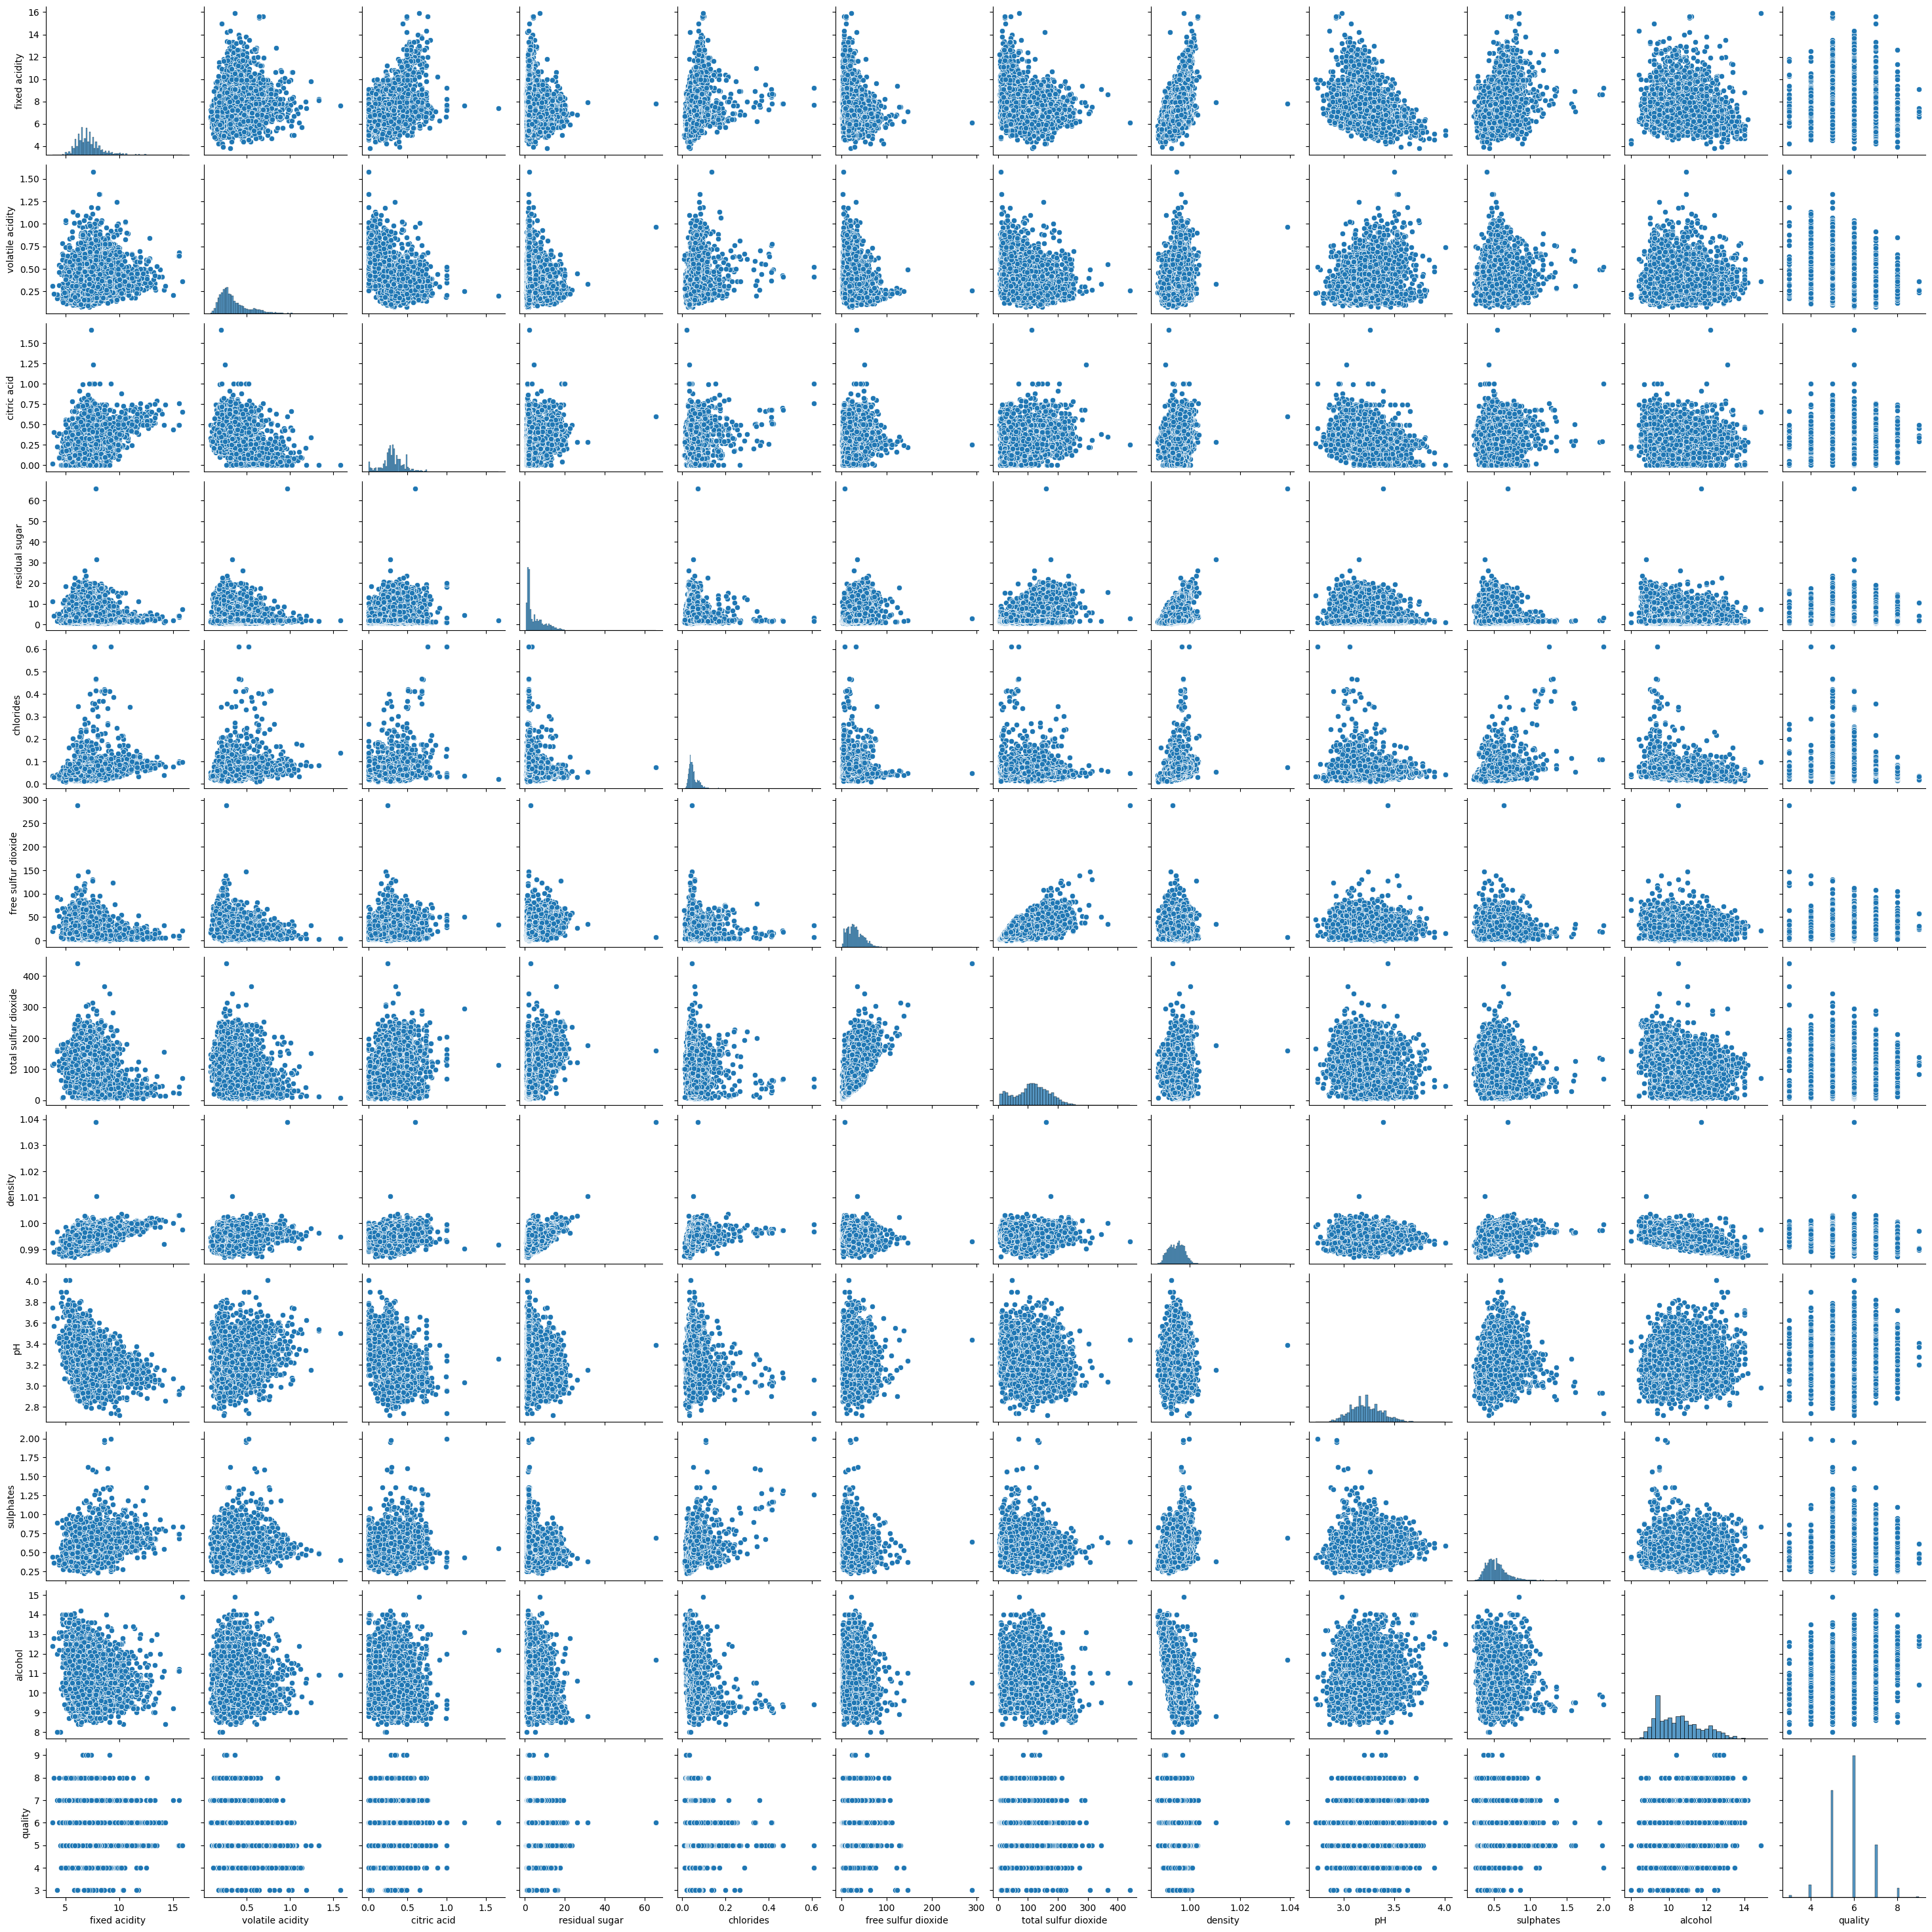

In [45]:
sns.pairplot(data)
plt.show()

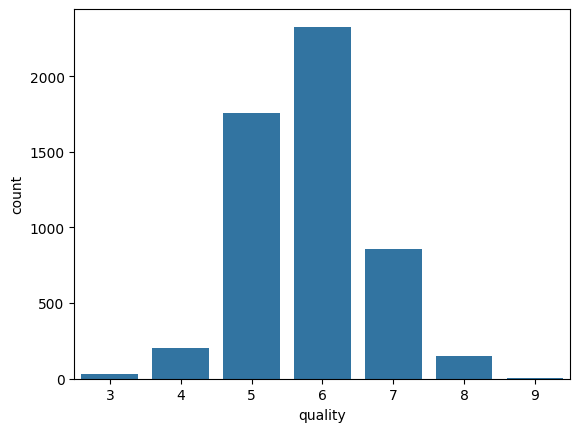

In [46]:
sns.countplot(x = 'quality',data=data)
plt.show()

Most of the rating

<Axes: xlabel='quality', ylabel='alcohol'>

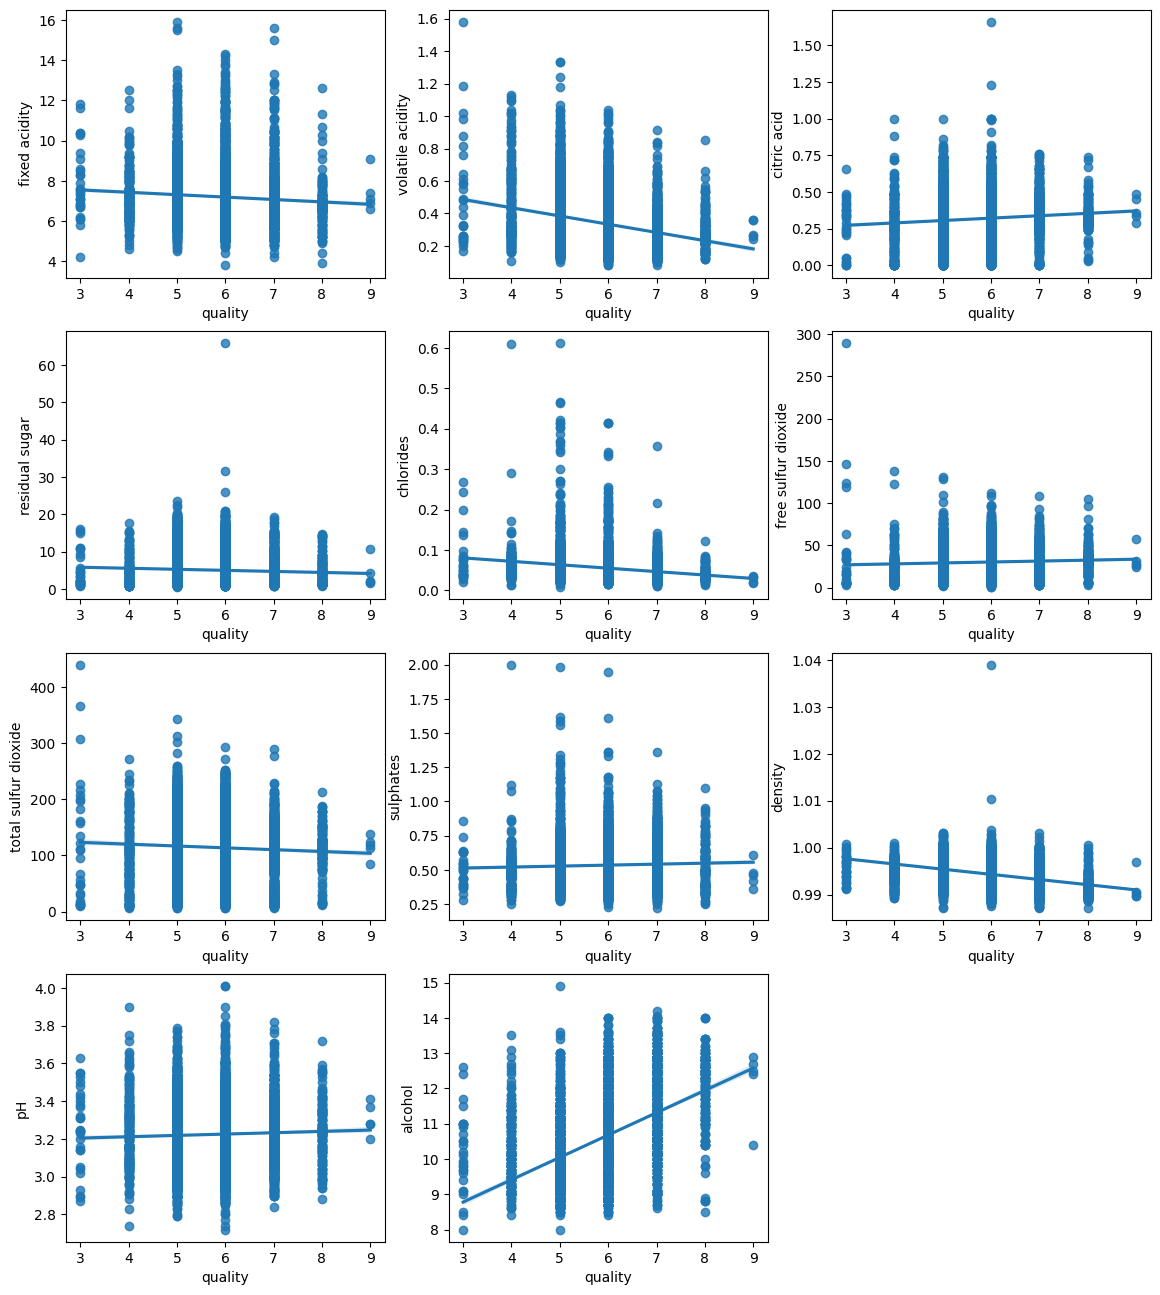

In [47]:
plt.figure(figsize=(14, 16))

plt.subplot(4, 3, 1)
sns.regplot(x = data['quality'], y = data['fixed acidity'])
plt.subplot(4, 3, 2)
sns.regplot(x = data['quality'], y = data['volatile acidity'])
plt.subplot(4, 3, 3)
sns.regplot(x = data['quality'], y = data['citric acid'])
plt.subplot(4, 3, 4)
sns.regplot(x = data['quality'], y = data['residual sugar'])
plt.subplot(4, 3, 5)
sns.regplot(x = data['quality'], y = data['chlorides'])
plt.subplot(4, 3, 6)
sns.regplot(x = data['quality'], y = data['free sulfur dioxide'])
plt.subplot(4, 3, 7)
sns.regplot(x = data['quality'], y = data['total sulfur dioxide'])
plt.subplot(4, 3, 8)
sns.regplot(x = data['quality'], y = data['sulphates'])
plt.subplot(4, 3, 9)
sns.regplot(x = data['quality'], y = data['density'])
plt.subplot(4, 3, 10)
sns.regplot(x = data['quality'], y = data['pH'])
plt.subplot(4, 3, 11)
sns.regplot(x = data['quality'], y = data['alcohol'])

<Axes: xlabel='quality', ylabel='alcohol'>

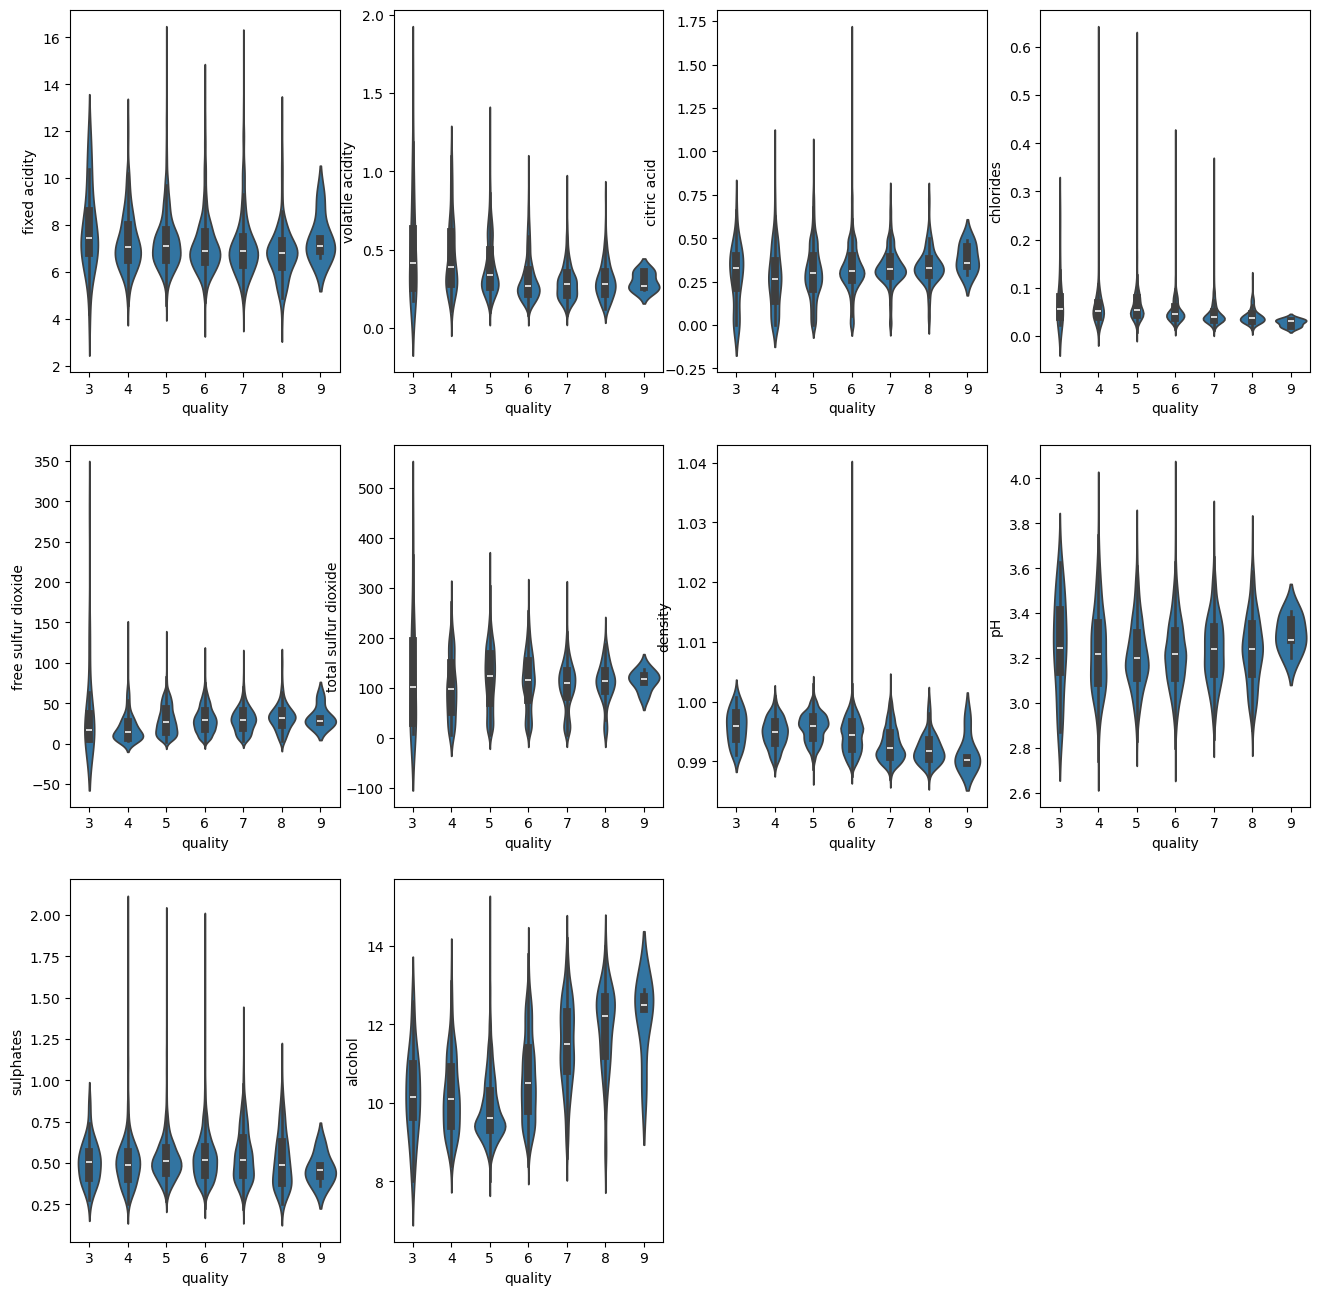

In [48]:
plt.figure(figsize=(16, 16))

plt.subplot(3, 4, 1)
sns.violinplot(data=data, y='fixed acidity', x='quality')
plt.subplot(3, 4, 2)
sns.violinplot(data=data, y='volatile acidity', x='quality')
plt.subplot(3, 4, 3)
sns.violinplot(data=data, y='citric acid', x='quality')
plt.subplot(3, 4, 4)
sns.violinplot(data=data, y= 'chlorides', x='quality')
plt.subplot(3, 4, 5)
sns.violinplot(data=data, y='free sulfur dioxide', x='quality')
plt.subplot(3, 4, 6)
sns.violinplot(data=data, y='total sulfur dioxide', x='quality')
plt.subplot(3, 4, 7)
sns.violinplot(data=data, y='density', x='quality')
plt.subplot(3, 4, 8)
sns.violinplot(data=data, y='pH', x='quality')
plt.subplot(3, 4, 9)
sns.violinplot(data=data, y='sulphates', x='quality')
plt.subplot(3, 4, 10)
sns.violinplot(data=data, y='alcohol', x='quality')

<Axes: >

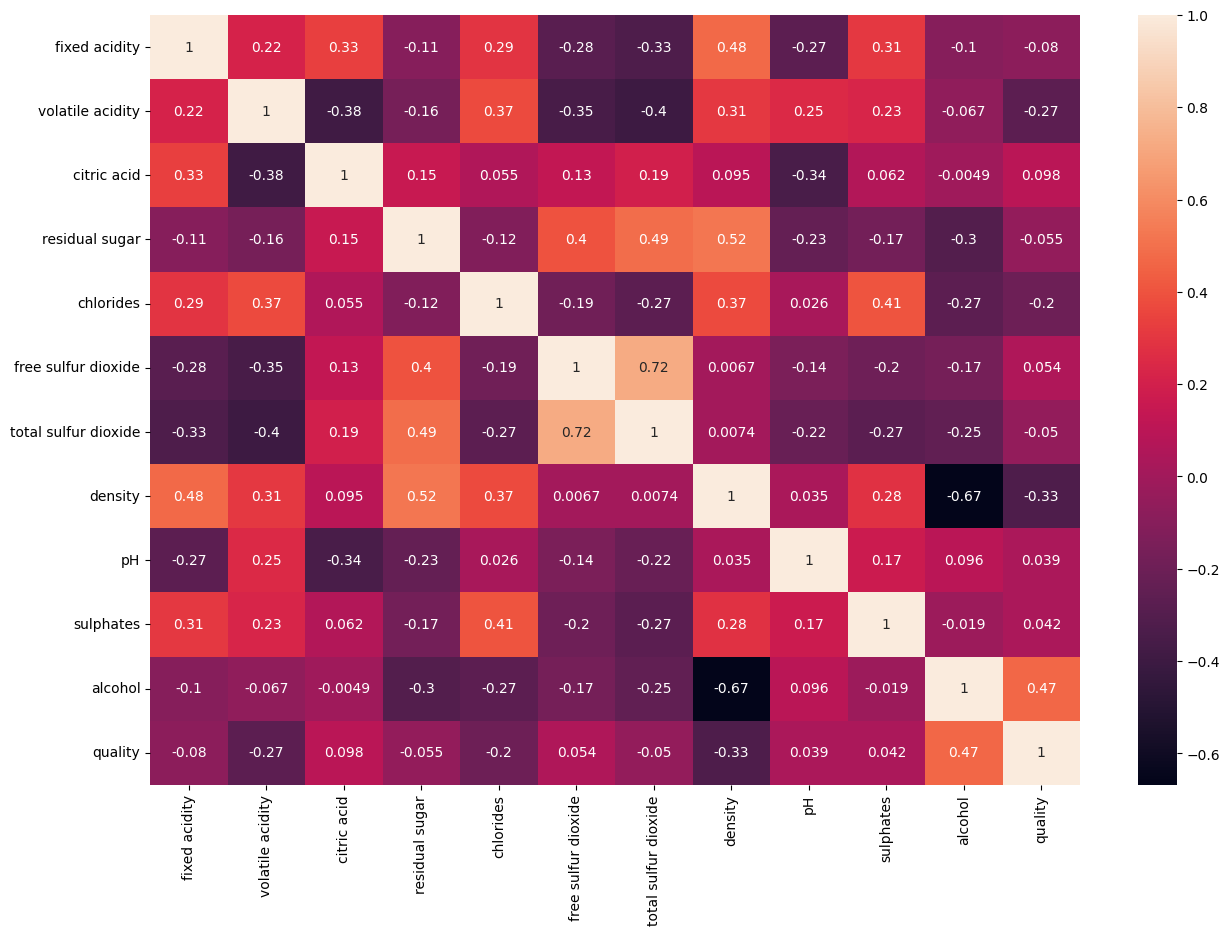

In [49]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True)

Quality is dependent on,

  1) alcohol

  2) sulphates

  3) pH

  4) free sulpher dioxide

  5) critric acis

In [50]:
x = data.drop("quality", axis=1)
y = data["quality"]

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
y = np.array(y).ravel()
# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(x, y)

# Get importances features
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(feature_importance_df)

                 Feature  Importance
10               alcohol    0.259474
1       volatile acidity    0.113761
5    free sulfur dioxide    0.093594
9              sulphates    0.080727
6   total sulfur dioxide    0.074192
8                     pH    0.070177
3         residual sugar    0.068812
4              chlorides    0.064631
2            citric acid    0.059996
7                density    0.057926
0          fixed acidity    0.056710


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20,random_state = 42)

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train = sc.fit_transform(Y_train.reshape(-1, 1))
y_test = sc.fit_transform(Y_test.reshape(-1, 1))

In [56]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red

        # for leaf node
        self.value = value

In [57]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["var_red"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):

        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def variance_reduction(self, parent, l_child, r_child):

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction

    def calculate_leaf_value(self, Y):

        val = np.mean(Y)
        return val

    def print_tree(self, tree=None, indent=" "):

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def predict(self, X):
        ''' function to predict a single data point '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

In [58]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=5)
regressor.fit(X_train,y_train)

In [59]:
predictions = regressor.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import math

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test,predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute percentage Error (MSPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 0.6858085656701763
Mean Squared Error (MSE): 0.8425800088062526
Mean absolute percentage Error (MSPE): 1.1277804331456676
Root Mean Squared Error (RMSE): 0.917921570073529
R-squared: 0.1574199911937474


In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
model = DecisionTreeRegressor(max_depth=5)

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [63]:
pred = model.predict(X_test)

In [64]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test,pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute percentage Error (MSPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 0.6540451749116256
Mean Squared Error (MSE): 0.7417753605889827
Mean absolute percentage Error (MSPE): 1.0575792618229556
Root Mean Squared Error (RMSE): 0.8612638159060108
R-squared: 0.25822463941101725


---------------------------------------Summary---------------------------------

Data set Name - Wine Quality Prediction

Data set size - 6497

Data set Shape - (6497, 13)

1) Data Cleaning

-> Droping Duplicates  

-> Checking Null Values

-> Filling null values using LinearRegression, mode, mean, median, std

2) Data Visualization

Quality is dependent on,

  1) alcohol

  2) sulphates

  3) pH

  4) free sulpher dioxide

  5) critric acis

 3) Model Building
  
  Model - Decision Tree

 4) Model BenchMerking
  
  Our model:

  Mean Absolute Error (MAE): 0.6858085656701763

  Mean Squared Error (MSE): 0.8425800088062526

  Mean absolute percentage Error (MSPE): 1.1277804331456676

  Root Mean Squared Error (RMSE): 0.917921570073529

  R-squared: 0.1574199911937474

  For Sklearn model:
  
  Mean Absolute Error (MAE): 0.6540451749116256

  Mean Squared Error (MSE): 0.7417753605889827

  Mean absolute percentage Error (MSPE): 1.0575792618229556

  Root Mean Squared Error (RMSE): 0.8612638159060108

  R-squared: 0.25822463941101725
